# Motor Escalar Autograd

Este proyecto es un motor autograd que usa únicamente valores escalares. Es capaz de guardar datos de variables en operaciones matemáticas y después calcular su comportamiento teniendo en cuenta sus hijos. Este tipo de técnica se usa para el entrenamiento de redes neuronales, con la finalidad de maximizar la eficiencia de las mismas.

El proyecto se separa en dos ficheros **_'engine.py'_**, que contiene todo lo necesario para crear y modificar valores, y **_'neural_network.py'_**, que contiene todo el código referente a la red neuronal.

## Engine.py

El fichero **_'engine.py'_** contiene el código necesario para el tratamiento de datos, como por ejemplo la creacion de objetos _Value_ y sus operaciones matemáticas como la _suma, resta, multiplicación, división, potencia, negación_ y otras funciones para conseguir la _uncidad lineal rectificada (ReLU)_ o para la _retropropagación_.

- Clase **_Value_** y sus parametros:

La clase **_Value_** es un objecto con el principal cometido de guardar la información que se va a usar posteriormente para realizar los calculos en la red neuronal. Este objeto esta definido con un constructor que le pasa un parámetro _data_ (valor numerico del objeto), un parámetro *_children* (una tupla que guarda todos los hijos del objeto), un parámetro *_op* (un valor escrito que guarda el tipo de operador usado para el cálculo del objeto actual) y un parámetro _label_ (un valor escrito que se usa como etiqueta en la visualización de datos).

A parte de los parámetros de construcción del objeto, dentro del mismo constructor se pueden observar el parámetro _grad_ que se usa para guardar el gradiente del objeto en comparación con el resultado final calculando la derivada del resultado final respecto al objeto actual ($\frac{dx}{dy}$ donde "$dx$" es la derivada del resultado final y "$dy$" es la derivada del objeto actual), el parámetro *_backward* que se usa para la retropropagación dentro de la red neuronal y el parámetro *_prev* que se usa para obtener los hijos del objeto actual.

A continuación se encuentra la defincición de la clase **_Value_** y un ejemplo de su construcción:

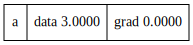

In [114]:
import visualization as vs

class Value:
    '''Class for Value data and its operations.'''

    def __init__(self, data, _children=(), _op='', label=''): # constructor
        self.data = data
        self.grad = 0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self): # print fucntion
        return f"Value(data={self.data}, grad={self.grad})"

'''Example'''
a = Value(3, label='a')

vs.draw_dot(a)

- Operador de **_suma_** - $x+y$:

El operador de **_suma_** se usa para hacer una adición de dos objetos **_Value_**. Para esto mismo se usa el símbolo **_"\+"_** en una ecuación que tiene una forma similar a la siguiente: $x + y$.

A continuación se encuentra la definicion del método **_\_\_add\_\__** y un ejemplo de su uso:

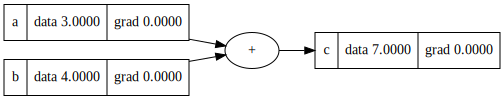

In [115]:
def __add__(self, other): # self + other
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
        self.grad += out.grad
        other.grad += out.grad
    out._backward = _backward
    return out

Value.__add__ = __add__

'''Example'''
a = Value(3, label='a')
b = Value(4, label='b')
c = a + b; c.label = 'c'

vs.draw_dot(c)

- Operador **_multiplicación_** - $x·y$:

El operador de **_multiplicación_** se usa para hacer un producto de dos objetos **_Value_**. Para esto mismo se usa el símbolo **_"\*"_** en una ecuación que tiene una forma similar a la siguiente: $x · y$, o en código $x*y$.

A continuación se encuentra la definicion del método **_\_\_mul\_\__** y un ejemplo de su uso:

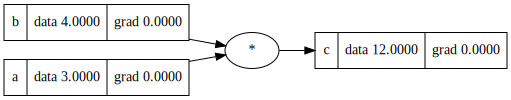

In [116]:
def __mul__(self, other): # self * other
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
        self.grad += other.data * out.grad
        other.grad += self.data * out.grad
    out._backward = _backward
    return out

Value.__mul__ = __mul__

'''Example'''
a = Value(3, label='a')
b = Value(4, label='b') 
c = a * b; c.label = 'c'

vs.draw_dot(c)

- Operador de **_potencia_** - $x^y$:

El operador de **_potencia_** se usa para hacer una potencia de dos objetos **_Value_**. Para esto mismo se usa el símbolo **_"\*\*"_** en una ecuación que tiene una forma similar a la siguiente: $x ^ y$, o en código: $x ** y$.

A continuación se encuentra la definicion del método **_\_\_pow\_\__** y un ejemplo de su uso:

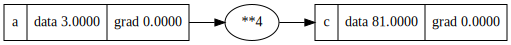

In [117]:
def __pow__(self, other): # self ** other
    assert isinstance(other, (int, float)), "only supporting int/float powers"
    out = Value(self.data**other, (self,), f'**{other}')
    def _backward():
        self.grad += (other * self.data**(other-1)) * out.grad
    out._backward = _backward
    return out

Value.__pow__ = __pow__

'''Example'''
a = Value(3, label='a')
b = 4
c = a ** b; c.label = 'c'

vs.draw_dot(c)

- Unidad lineal rectificada _(ReLU)_ - $f(x) = max(0,x)$:

La función de activación de **_unidad lineal rectificada_** o **_ReLU_** se usa para conseguir un valor positivo de salida en los objetos **_Value_**. Para esto mismo se usa el método **_.relu()_**. La ecuación tiene una forma similar a la siguiente: $f(x) = max(0,x)$, por lo que los valores de salida negativos serán devueltos como **_0_** y los valores de salida positivos serán devueltos como su **_valor original_**.

Función ReLU $f(x) = max(0,x)$ en una gráfica teniendo como entrada la función $x=y$:

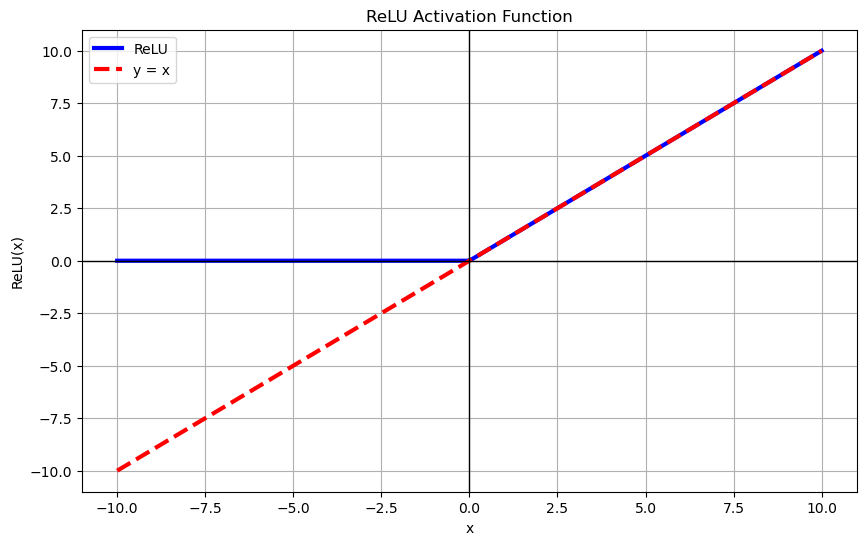

In [118]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 200)
y = relu(x)

plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(x, y, 'b', label='ReLU', linewidth=3)
plt.plot(x, x, 'r--', label='y = x', linewidth=3)
plt.axhline(y=0, color='k', linestyle='-', linewidth=1)
plt.axvline(x=0, color='k', linestyle='-', linewidth=1)
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.legend()


plt.show()

A continuación se encuentra la definicion del método **_relu_** y dos ejemplos de su uso, uno con cada tipo de salida de dato:

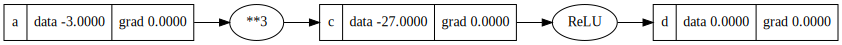

In [119]:
def relu(self): # ReLU function
    out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')
    def _backward():
        self.grad += (out.data > 0) * out.grad
    out._backward = _backward
    return out

Value.relu = relu

'''Example'''
#if the output is negative, returns 0
a = Value(-3, label='a')
b = 3
c = a ** b; c.label = 'c'
d = c.relu(); d.label = 'd' # returns 0

vs.draw_dot(d)

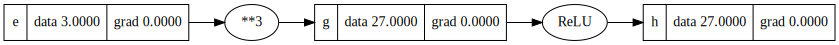

In [120]:
#if the output is positive, returns the output
e = Value(3, label='e')
f = 3
g = e ** f; g.label = 'g'
h = g.relu(); h.label = 'h' # returns 81

vs.draw_dot(h)

- Retropropagación:

La **_retropropagación_** se usa para calcular el gradiente de la funcion de pérdida (comparación entre la salida obtenida y la salida deseada, como por ejemplo: $f(y, y') = (y - y')^2$ donde "$y$" es la salida obtenida e "$y'$" es la salida deseada) con respecto a los parámetros anteriores. Esto permite observar como se comporta una operación en concreto y permite realizar los cambios necesarios para minimizar pérdidas y conseguir un mejor resultado. Para esto se usa el método **_.backward()_**.

Al llamar a este método se calcula de forma regresiva (de final a principio) los gradientes de cada objeto comparando la derivada del resultado final en cuanto a la derivada del objeto actual ($\frac{dx}{dy}$).

Por ejemplo: teniendo en cuenta que tenemos un objeto "a" y un objeto "b" que resultan en un objeto "e" ($a·b=e$), el resultado "e" se suma con un objeto "c" que resulta en "d" ($e+c=d$) y el resultado "d" se multiplica por un objeto "g" que da el resultado final "L" ($d·g=L$), haciendo la **_retropropagacion_** estariamos calculando los gradientes en el siguiente orden y de la siguiente manera teniendo en cuenta que una derivada se expresaría de la siguiente manera $(f(x+h)-f(x))/h$ donde $x$ es el valor sobre el que se aplica la derivada y $h$ es un valor cambiante:

1. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "L": $\frac{dL}{dL} = 1$
2. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "d": $\frac{dL}{dd} = ((d+h)·g - g·(d))/h = (d·g + h·g - g·d)/h = h·g/h = g = -2$
3. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "g": $\frac{dL}{dg} = ((g+h)·d - d·(g))/h = (g·d + h*d - d·g)/h = h·d/h = d = 4$
4. Empezar a calcular las derivadas intermedias:
    1. Calcular el gradiente de la derivada de "d" en cuanto a la derivada de "e": $\frac{dd}{de} = ((e+h+c) - (c+e))/h = (h)/h = 1$
    2. Calcular el gradiente de la derivada de "d" en cuanto a la derivada de "c": $\frac{dd}{dc} = ((c+h+e) - (e+c))/h = (h)/h = 1$
    3. Calcular el gradiente de la derivada de "e" en cuanto a la derivada de "a": $\frac{de}{da} = ((a+h)·b - b·(a))/h = (a·b + h·b - b·a)/h = h·b/h = b = -3$
    4. Calcular el gradiente de la derivada de "e" en cuanto a la derivada de "b": $\frac{de}{db} = ((b+h)·a - a·(b))/h = (b·a + h·a - a·b)/h = h·a/h = a = 2$

Para calcular los gradientes de los objetos que no están directamente conectados se usa la **_regla de la cadena_** donde $\frac{dy}{dx}=\frac{dy}{du}·\frac{du}{dx}$.

5. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "e" usando la regla de la cadena: $\frac{dL}{de} = \frac{dL}{dd}·\frac{dd}{de} = -2 · 1 = -2$
6. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "c" usando la regla de la cadena: $\frac{dL}{dc} = \frac{dL}{dd}·\frac{dd}{dc} = -2 · 1 = -2$
7. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "a" usando la regla de la cadena: $\frac{dL}{da} = \frac{dL}{de}·\frac{de}{da} = -2 · (-3) = 6$
8. Calcular el gradiente de la derivada de "L" en cuanto a la derivada de "b" usando la regla de la cadena: $\frac{dL}{db} = \frac{dL}{de}·\frac{de}{db} = -2 · 2 = -4$

A continuación se encuentra la definición del método **_backward_** y un ejemplo de su uso:

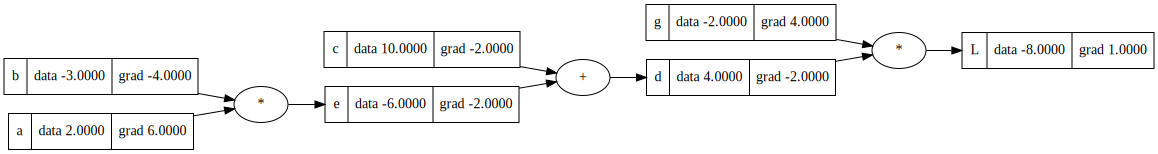

In [127]:
def backward(self): # backpropagation
    topo = []
    visited = set()
    def build_topo(v):
        if v not in visited:
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
    build_topo(self)
    self.grad = 1
    for v in reversed(topo):
        v._backward()

Value.backward = backward

'''Example'''
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = e + c; d.label = 'd'
e = a*b; e.label = 'e'
g = Value(-2.0, label='g')
L = d * g; L.label = 'L'
L.backward()

vs.draw_dot(L)

- Operador de **_negación_** - ($-x$):

El operador de **_negación_** se usa para negar el valor de los datos de un objeto **_Value_**. Para esto se usa el símbolo **_"-"_** delante de la variable. La ecuación que se usa para esto es la siguiente: $x = x · (-1)$ o en su modo simplificado $x = -x$.

A continuación se encuentra la definición del método **_\_\_neg\_\__** y un ejemplo de su uso:

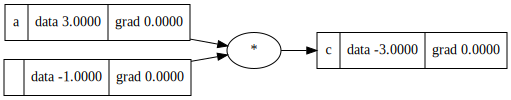

In [122]:
def __neg__(self): # -self
    return self * -1

Value.__neg__ = __neg__

'''Example'''
a = Value(3, label='a')
c = -a; c.label = 'c'

vs.draw_dot(c)

- Operador de **_resta_** - ($x-y$):

El operador de **_resta_** se usa para substraer el valor de dos objetos **_Value_**. Para esto se usa el símbolo **_"-"_** entre dos objetos. La ecuación que se usa para esto es la siguiente: $x - y$, que se puede expandir de la siguiente manera si se cambia la expresión de negación: $x + [y * (-1)]$.

A continuación se encuentra la definición del método **_\_\_sub\_\__** y un ejemplo de su uso:

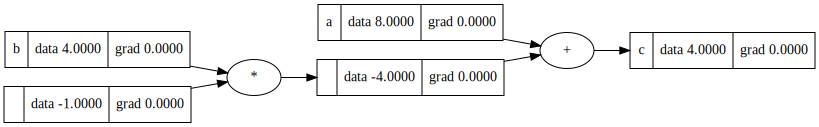

In [123]:
def __sub__(self, other): # self - other
    return self + (-other)

Value.__sub__ = __sub__

'''Example'''
a = Value(8, label='a')
b = Value(4, label='b')
c = a - b; c.label = 'c'

vs.draw_dot(c)

- Operador de **_división_** ($x/y$):

El operador de **_división_** se usa para dividir el valor de dos objetos **_Value_**. Para esto se usa el símbolo **_"/"_** entre dos objetos. La ecuación que se usa para esto es la siguiente: $x / y$, que se puede expandir de la siguiente manera: $x * [y^{-1}]$.

A continuación se encuentra la definición del método **_\_\_truediv\_\__** y un ejemplo de su uso:

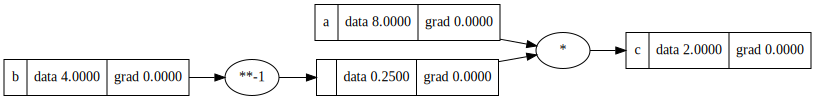

In [124]:
def __truediv__(self, other): # self / other
    return self * other**-1

Value.__truediv__ = __truediv__

'''Example'''
a = Value(8, label='a')
b = Value(4, label='b')
c = a / b; c.label = 'c'

vs.draw_dot(c)

Aparte de todos los anteriores, la clase _Value_ tiene propiedades para guardar los hijos y los operadores que se han usado para conseguir el objeto actual:

- Propiedad para acceder a los hijos del nodo actual *(._prev)*:

Esta propiedad devuelve los hijos del objeto actual, por ejemplo: si definimos un objeto "a" con el valor _1_ y un objeto "b" con el valor _2_ al hacer la suma de los dos objetos conseguiríamos un objeto "c" con el valor _3_, si usamos la propiedad **_\.\_prev_** con el objeto "c" nos devolvería los objetos "a" y "b" puesto que son los objetos utilizados para crear el objeto "c", es decir, sus hijos.

A continuación se encuentra un ejemplo del uso de la propiedad:

In [125]:
'''Example'''
a = Value(3, label='a')
b = Value(7, label='b')
c = a + b; c.label = 'c'

c._prev # returns the children of c, in this case a and b

{Value(data=3, grad=0), Value(data=7, grad=0)}

- Propiedad para acceder al tipo de operador que ha creado el nodo actual *(._op)*:

Esta propiedad devuelve el operador que se ha usado para conseguir el objeto actual. Por ejemplo: si hacemos la suma de dos objetos y usamos la propiedad **_\.\_op_** sobre el resultante obtendremos el símbolo _"+"_ puesto a que la operación realizada ha sido una suma.

A continuación se encuentra un ejemplo del uso de la propiedad:

In [126]:
'''Example'''
a = Value(5, label='a')
b = Value(2, label='b')
c = a / b; c.label = 'c'

c._op # returns the operator that was used to create the value, in this case multiplication '*'

'*'

## Neural_network.py